$~$

# IT Academy - Data Science Itinerary

$~$



## S03 T02: Graphic Visualization of Multiple Variables
__________

$~$

**1 :**

$~$

PRACTICE WITH the notebook on GitHub ["03 EXAMINING DATE"](https://github.com/IT-Academy-BCN/Data-Science/tree/main/Examining-Data) with seaborn and the ["tips"](https://github.com/IT-Academy-BCN/Data-Science/tree/main/Data-sources) dataset. 

$~$

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from matplotlib import rcParams
import matplotlib as mpl
from matplotlib import cm
from matplotlib import colors


$~$

*we are going to replicate the notebook: ["03 EXAMINING DATE"](https://github.com/IT-Academy-BCN/Data-Science/tree/main/Examining-Data) , but using the indicated data set*

$~$


    EXAMINING NUMERICAL DATA

$~$

Here we will be introduced to techniques for exploring and summarizing numerical variables.

$~$

Let's start with the basics: load our dataset

$~$

In [2]:
path =  "./data/tips.csv"

In [3]:
tips = pd.read_csv (path)

$~$

After load our dataset with read_csv(), we would like to get some general information about the data:

$~$


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


$~$
#### *our dataset is composed by the following variables*:

+ total_bill = bill in dollars

+ tip = tip in dollars

+ sex = sex of the bill payer

+ smoker = whether there were smokers in the party

+ day = day of the week

+ time= time of day

+ size = size of the party

$~$

*it is important to know what each variable means*

$~$

In [5]:
tips.shape

(244, 7)

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


$~$  
   
    it is a good practice to check for null values:

$~$  


*note that in the .info() method we can see if there are null values,*

$~$

In [7]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

$~$
    
    Let's show at a statistical summary of our dataframe:
    
$~$

In [8]:
tips.describe().round(2)

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


$~$

Looking the table above we can obtain some basic information about our dataframe, for example, now we know that the maximum number of people who had (dinner or lunch) were 6. We can also know that the maximum payed for one (dinner or lunch) was 50.81 dollars, and the minimum was 3.01 dollars. 

$~$

However, this doesn't give us enough information so let`s move on to a further in our analysis.


$~$

$~$

    EXPLORING BIVARIATE VARIABLES WITH SCATTERPLOTS
    
$~$

A Scatterplot provides a case-by-case view of data for two (bivariate) numerical variables.

Scatterplots are helpful in quickly spotting associations relating variables, whether those associations come in the form of simple trends or whether those relationships are more complex.


$~$

In [9]:
#since we are going to work with the same colors
#for the whole notebook let's define them in this cell

hue_colors2 = {"Female": "#d966ff",
              "Male": "#4d94ff"}

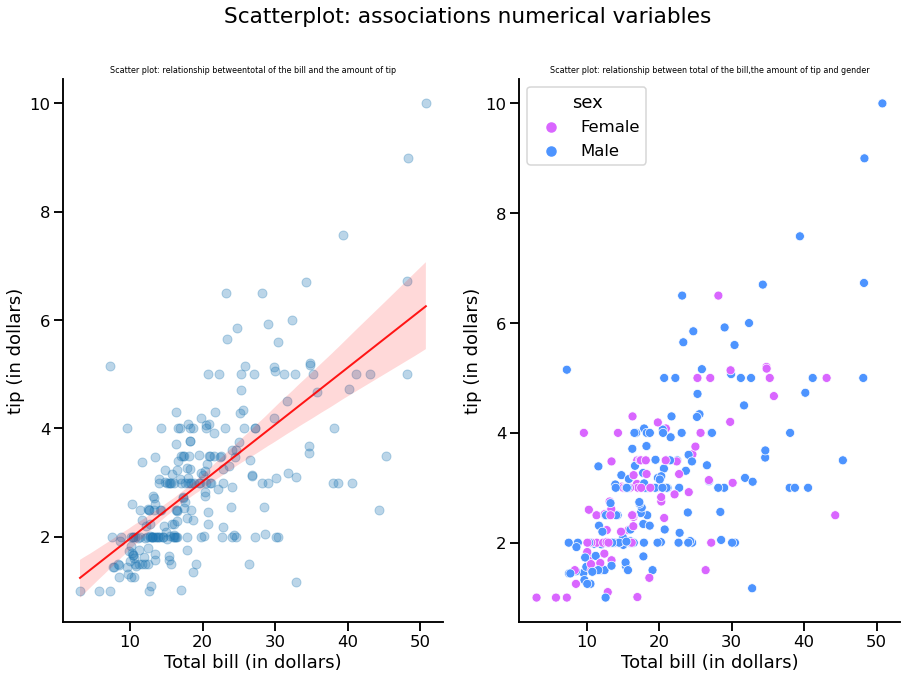

In [10]:
sns.set_context("talk")

#plot with two figures
fig,axes = plt.subplots(1,2, figsize=(15,10))
fig.suptitle("Scatterplot: associations numerical variables")

#first plot shows the regression line

sns.regplot(x="total_bill", y="tip",data=tips,ax=axes[0],
            line_kws={"color":"r","alpha":0.9,"lw":2},
            scatter_kws={'alpha':0.3})

axes[0].set_title("Scatter plot: relationship between\
total of the bill and the amount of tip",fontsize=8)
axes[0].set_xlabel("Total bill (in dollars)")
axes[0].set_ylabel("tip (in dollars)")
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)


hue_colors2 = {"Female": "#d966ff",
              "Male": "#4d94ff"}

#second plot shows a different color for each point according to each gender
sns.scatterplot(x="total_bill",
                y="tip",
                data=tips,
                hue="sex",
                palette=hue_colors2,ax=axes[1])


axes[1].set_title("Scatter plot: relationship between \
total of the bill,the amount of tip and gender"
,fontsize=8)

axes[1].set_xlabel("Total bill (in dollars)")
axes[1].set_ylabel("tip (in dollars)")
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)


plt.show()


In the plot above we can see that the relationship between the variables is **evidently linear**. The higher the bill, the higher the tip.

$~$

Let's see what else we can observe using scaters plots:

$~$


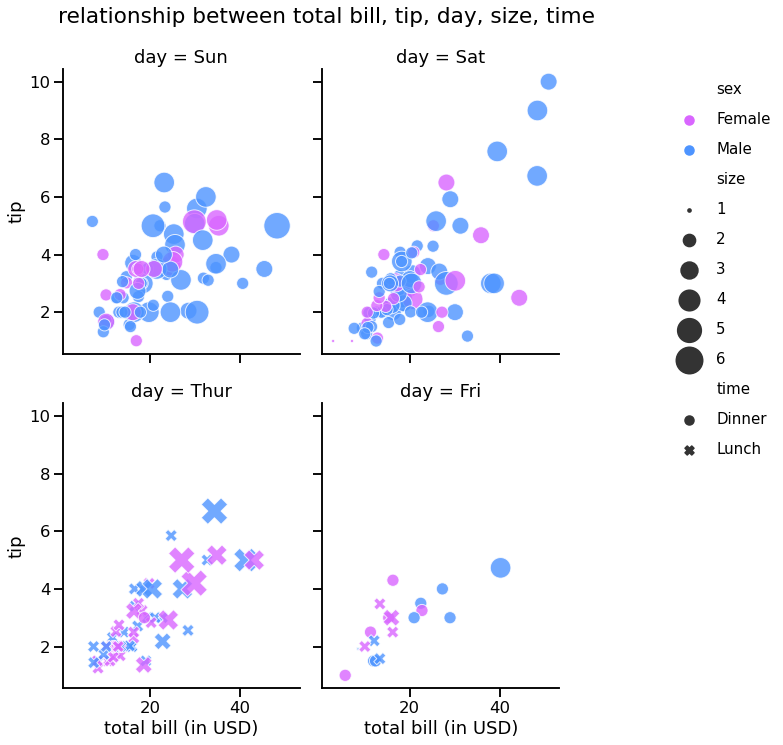

In [11]:
sns.set_context("talk")

ax = sns.relplot(x="total_bill", y="tip", data=tips,
                kind="scatter",col="day",hue="sex",
                palette=hue_colors2,col_wrap=2,
                size="size",sizes=(10, 700),
                 alpha=0.8,style="time")

ax.fig.set_figwidth(9.27)
ax.fig.set_figheight(10.7)

#move overall title up
ax.fig.subplots_adjust(top=.9)

ax.fig.suptitle("relationship between \
total bill, tip, day, size, time")

ax.set(xlabel="total bill (in USD)")


sns.move_legend(ax, "upper left", 
                bbox_to_anchor=(1,0.9),
                labelspacing=1,
               fontsize= 15,
               )

plt.show()


$~$

From the previous plot we can know, for example, that on Sundays there are no dinners, on Thursdays there are more lunches than dinners, and on Saturdays there are more dinners than lunches and the highest bills are from this day

$~$

$~$


    EXPLORING VARIABLES WITH HISTOGRAMS
    
$~$

Histograms are especially convenient for describing the shape of the data distribution and to looking at whether a distribution is *Skewed* or *Symmetric*

$~$

$~$
![Alt text](https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png)

$~$

other than that, we can also look the the kurtosis form of the data distribution:

$~$

![Alt text](https://i2.wp.com/www.tutorialspoint.com/statistics/images/kurtosis.jpg?w=578&ssl=1)

$~$

+ Mesokurtic: This is the normal distribution

+ Leptokurtic: This distribution has fatter tails and a sharper peak. The kurtosis is “positive” with a value greater than 3

+ Platykurtic: The distribution has a lower and wider peak and thinner tails. The kurtosis is “negative” with a value greater than 3 

$~$


![Alt text](https://www.daytrading.com/wp-content/uploads/2021/09/Kurtosis.jpg)

$~$

$~$

let's see some histograms:

$~$

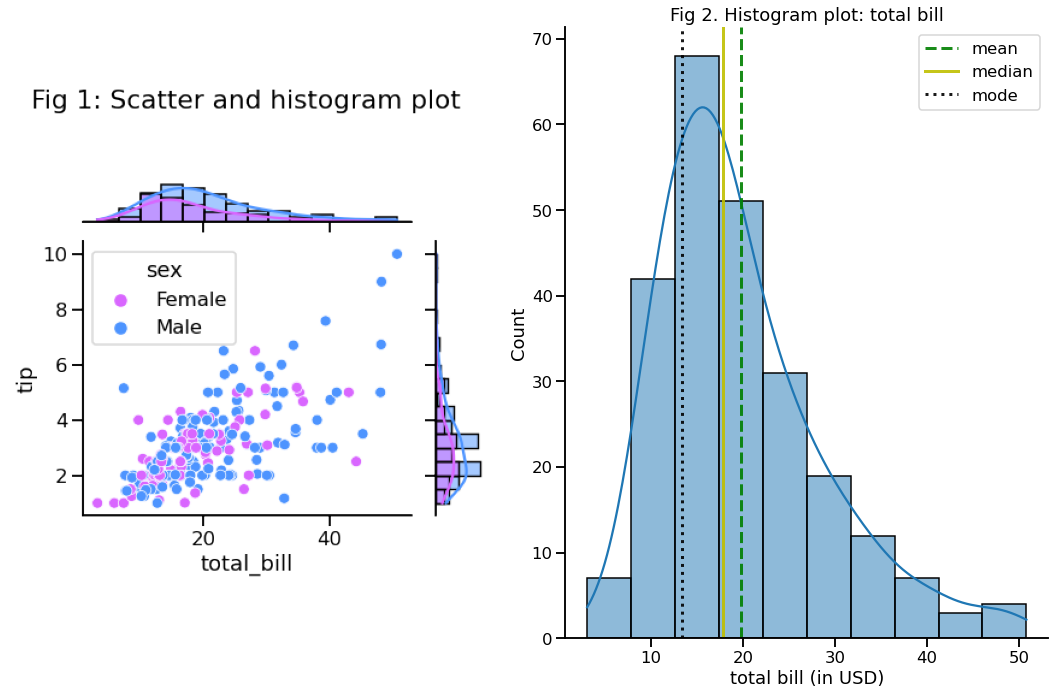

In [12]:
# create plot
sns.set_context("talk")
g1 =sns.JointGrid(data=tips, x="total_bill", y="tip", space=0.5, 
                  hue="sex",palette=hue_colors2)
g1.plot_joint(sns.scatterplot)
g1.plot_marginals(sns.histplot,kde=True)
g1.fig.suptitle('Fig 1: Scatter and histogram plot')

#move overall title up
g1.fig.subplots_adjust(top=.8)




# save plot in memory temporally


g1.savefig('./plot/g1.png')
plt.close(g1.fig)



# create subplots from temporal images
f, axes = plt.subplots(1, 2, figsize=(15,10))

axes[0].imshow(mpimg.imread('./plot/g1.png'))

# turn off x and y axis

axes[0].set_axis_off()

# create histogram plot
sns.histplot(data=tips,x="total_bill", bins=10, kde=True, ax=axes[1],
            palette=hue_colors2, alpha=0.5).set(title='Fig 2. Histogram plot: total bill')




#calculate mean, median and mode 

mean = tips['total_bill'].mean()
median = tips['total_bill'].median()
mode = tips['total_bill'].mode().values[0]

#plot lines
axes[1].axvline(x=mean, linewidth=3, color='g', label="mean", alpha=0.9,ls='--')
axes[1].axvline(x=median, linewidth=3, color='y', label="median", alpha=0.9,ls='-')
axes[1].axvline(x=mode, linewidth=3, color='black', label="mode", alpha=0.9,ls=':')
axes[1].legend()
axes[1].set(xlabel="total bill (in USD)")

#turn top and right

axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
plt.tight_layout()

plt.show()

$~$

fig 2 confirms that the distribution for *total bill* is **right skewed** or also called **skewed to the positive end**.

$~$

In addition, regarding the modal distribution for total bill we got a **multimodal distribution**

$~$


$~$

    "A mode is represented by a prominent peak in the distribution. There is only one prominent peak in 
    the histogram of num_char.
    
    Histogram that have one, two, or three prominent peaks are called Unimodal
    Bimodal, and Multimodal, respectively.
    
    Any distribution with more than 2 prominent peaks is called Multimodal. Notice that there was one 
    prominent peak in the Unimodal distribution with a second less prominent peak that was not counted since 
    it only differs from its neighboring bins by a few observations" 
    
*source: [Statistical Foundations for Data Scientist by A. Kumenius](https://github.com/IT-Academy-BCN/Data-Science/blob/main/Examining-Data/03%20EXAMINING%20DATA.ipynb)
    
$~$

$~$

Let's see how is the distribution of the variable *total bill* per day:

$~$

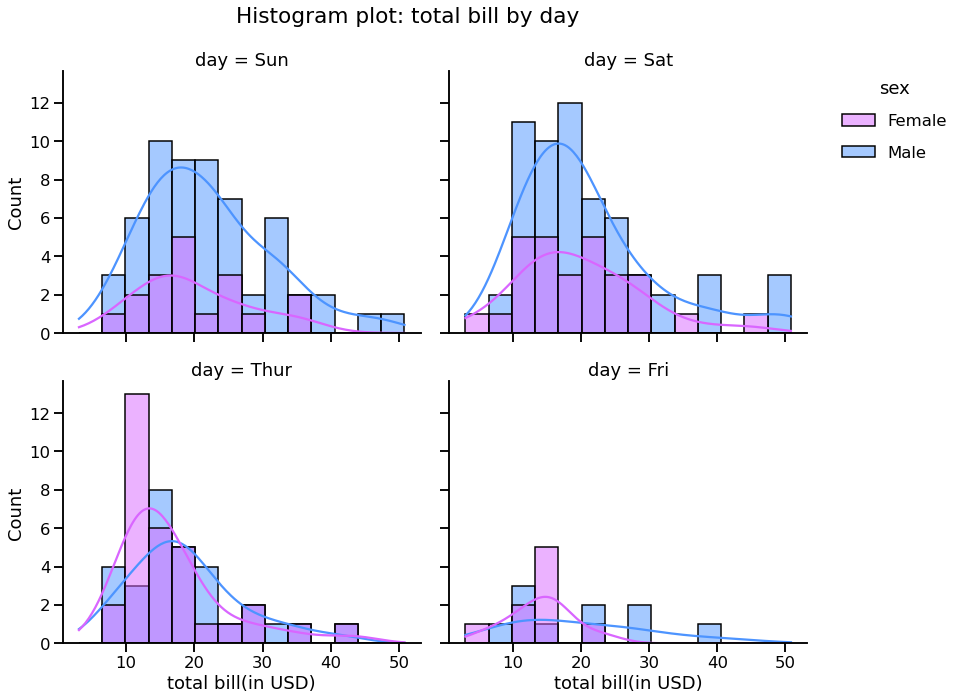

In [13]:
sns.set_context("talk")

ax = sns.displot(tips, x="total_bill",kde=True, 
            col="day", hue="sex",alpha=0.5,
            palette=hue_colors2,
            col_wrap=2)

ax.fig.subplots_adjust(top=.89)

ax.fig.suptitle("Histogram plot: total bill by day")
ax.set(xlabel="total bill(in USD)")




sns.move_legend(ax, "upper left", 
                bbox_to_anchor=(1,0.9),
                labelspacing=1,
               )
plt.tight_layout()
plt.show()

$~$

looking the distribution of *total bill* by day seems less skewed. This is best appreciated by looking it by gender. besides it,  is important to highlight how the shape of the kurtosis of the curves changes by days and also by gender

$~$


$~$


let's see how some histograms for tip:

$~$

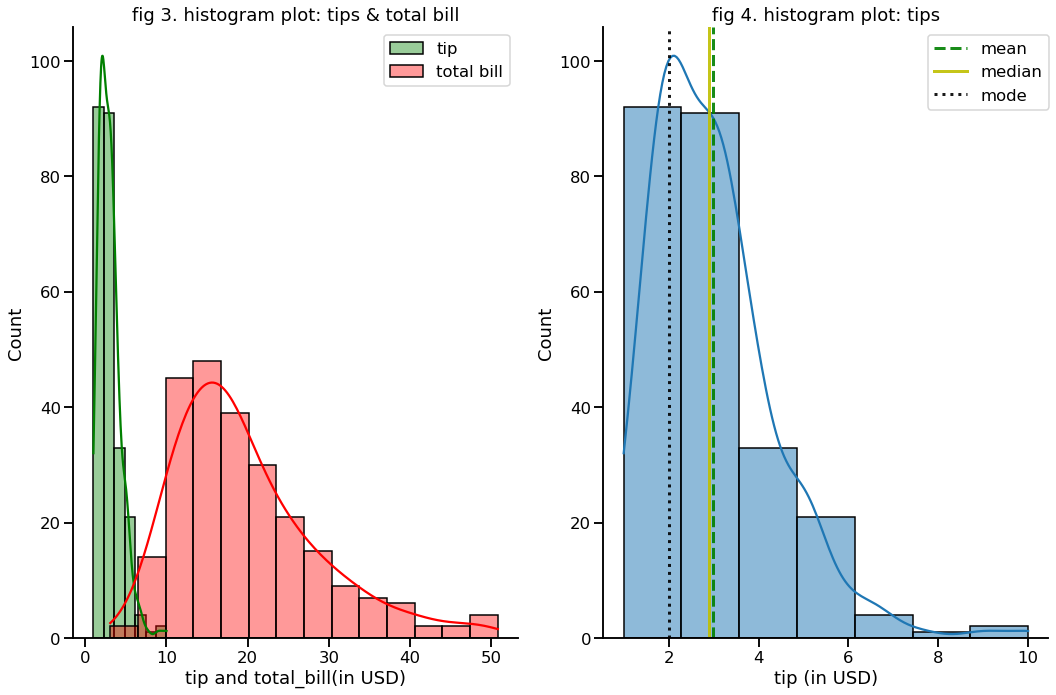

In [14]:
sns.set_context("talk")

fig,axes = plt.subplots(1,2, figsize=(15,10))


sns.histplot(x="tip", data=tips,color='g',ax=axes[0],
             bins=7,kde=True,alpha=0.4, label="tip", legend=True)
sns.histplot(x="total_bill", data=tips,color='r',
             ax=axes[0],kde=True,alpha=0.4,label="total bill", legend=False)

axes[0].set(xlabel="tip and total_bill(in USD)")
axes[0].set(title="fig 3. histogram plot: tips & total bill")

axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

axes[0].legend()


#calculate mean, median and mode 
mean=tips['tip'].mean()
median=tips['tip'].median()
mode=tips['tip'].mode().values[0]


sns.histplot(x="tip", data=tips,palette=hue_colors2,ax=axes[1],
                  bins=7,kde=True, 
                  legend=True).set(title='fig 4. histogram plot: tips')


axes[1].axvline(x=mean, linewidth=3, color='g', label="mean", alpha=0.9,ls='--')
axes[1].axvline(x=median, linewidth=3, color='y', label="median", alpha=0.9,ls='-')
axes[1].axvline(x=mode, linewidth=3, color='black', label="mode", alpha=0.9,ls=':')

axes[1].legend()


axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].legend(bbox_to_anchor=(1.02, 1), loc=1)
axes[1].set(xlabel="tip (in USD)")


plt.tight_layout()
plt.show()
    

$~$

+ first, in fig 1. we see together both variables. Here we observed how the total bill's curve look less thin that tip's curve. This in kurtosis's terms means that the tip's curve have a *letokurtic* form.

+ in fig 2. tip's histogram shows a **right skewed** and **bimodal distribution**.

$~$


let's see how is the distribution of tip day by day:


$~$


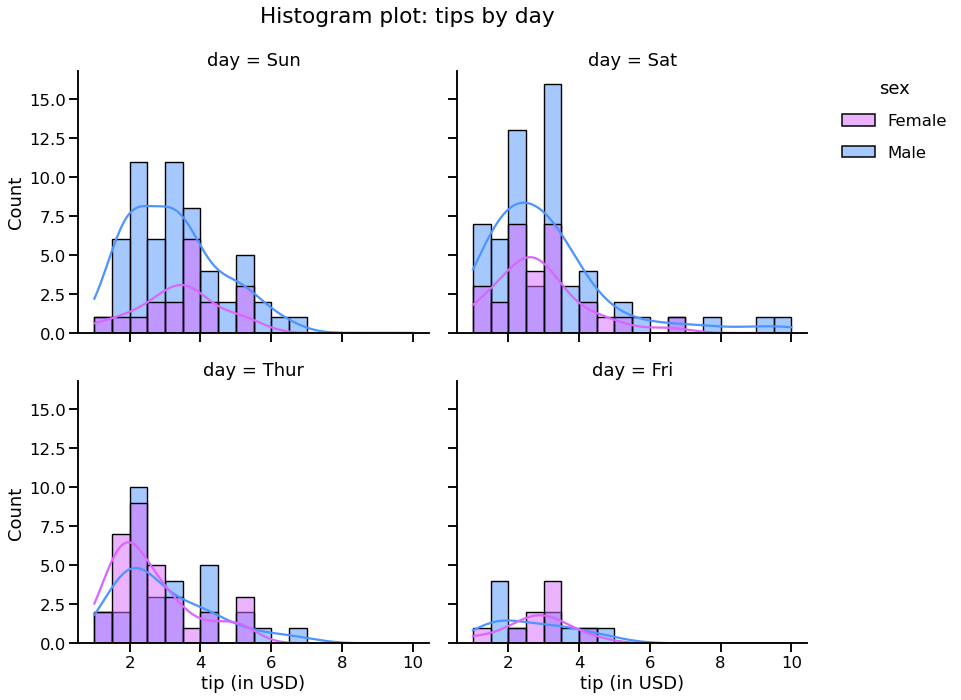

In [15]:
sns.set_context("talk")

ax = sns.displot(tips, x="tip",kde=True, 
            col="day", hue="sex",alpha=0.5,
            palette=hue_colors2,
            col_wrap=2)

ax.fig.subplots_adjust(top=.89)

ax.fig.suptitle("Histogram plot: tips by day")

ax.set(xlabel="tip (in USD)")


sns.move_legend(ax, "upper left", 
                bbox_to_anchor=(1,0.9),
                labelspacing=1,
               )
plt.tight_layout()
plt.show()

$~$

+ as in *total bill*, we see how the shape of the distributions of the curve change by day and also by gender.

$~$

$~$

    
    BOX PLOTS

    
$~$



As we read in ["03 EXAMINING DATE"](https://github.com/IT-Academy-BCN/Data-Science/tree/main/Examining-Data) : "A Box Plot summarizes a dataset using five statistics while also plotting unusual observations - Anomalies or Outliers" 

which are:

+ min,
+ max,
+ 25% percentile,
+ median (50% percentile),
+ 75 % percentile.


$~$

let's see these for total bill and for tips

$~$

In [16]:
print("total_bill")
display(tips["total_bill"].describe())

print("tip")
display(tips["tip"].describe())


total_bill


count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

tip


count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64


$~$

Let's see the same information in a boxplot:

$~$

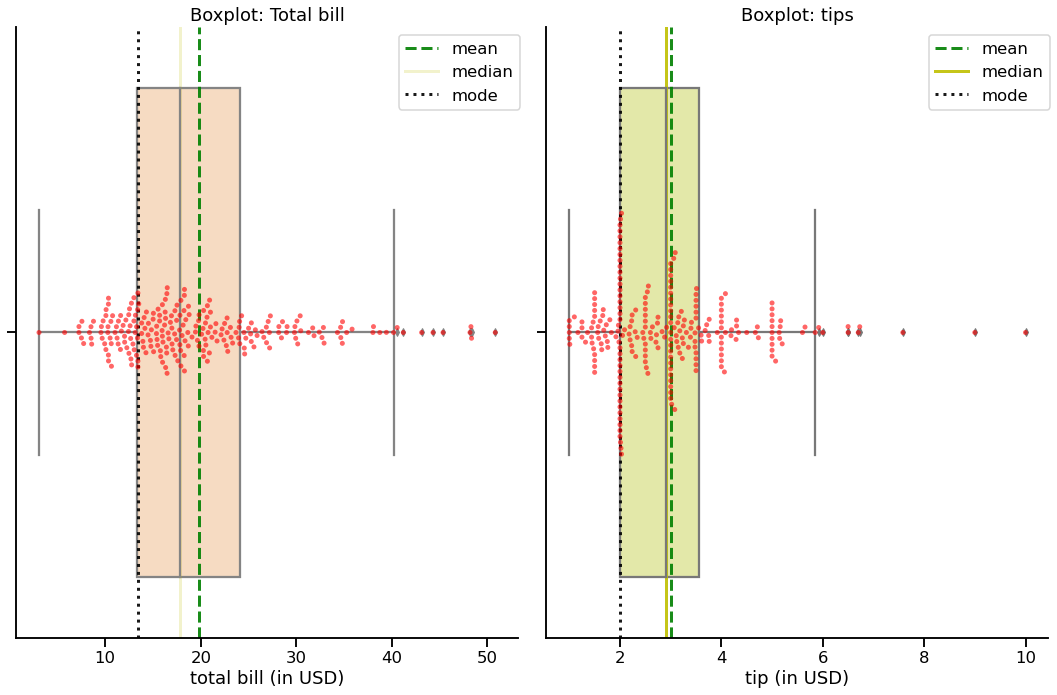

In [17]:
sns.set_context("talk")

fig,axes = plt.subplots(1,2, figsize=(15,10))

sns.boxplot(data=tips,x="total_bill",ax=axes[0], color="#ffdab9")
sns.swarmplot(data=tips,x='total_bill', color='red', alpha = 0.6,ax=axes[0])

axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)



#calculate mean, median and mode 
mean=tips['total_bill'].mean()
median=tips['total_bill'].median()
mode=tips['total_bill'].mode().values[0]

#plot lines
axes[0].axvline(x=mean, linewidth=3, color='g', label="mean", alpha=0.9,ls='--')
axes[0].axvline(x=median, linewidth=3, color='y', label="median", alpha=0.2,ls='-')
axes[0].axvline(x=mode, linewidth=3, color='black', label="mode", alpha=0.9,ls=':')
axes[0].legend(bbox_to_anchor=(1.02, 1), loc=1)

axes[0].set(xlabel="total bill (in USD)",title="Boxplot: Total bill")


sns.boxplot(data=tips,x="tip",ax=axes[1], color="#ecf39e")
sns.swarmplot(data=tips,x='tip', color='red', alpha = 0.6,ax=axes[1])
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)


#calculate mean, median and mode 
mean1=tips['tip'].mean()
median1=tips['tip'].median()
mode1=tips['tip'].mode().values[0]

#plot lines
axes[1].axvline(x=mean1, linewidth=3, color='g', label="mean", alpha=0.9,ls='--')
axes[1].axvline(x=median1, linewidth=3, color='y', label="median", alpha=0.9,ls='-')
axes[1].axvline(x=mode1, linewidth=3, color='black', label="mode", alpha=0.9,ls=':')
axes[1].legend(bbox_to_anchor=(1.02, 1), loc=1)
axes[1].set(xlabel="tip (in USD)", title="Boxplot: tips")


plt.tight_layout()
plt.show()

$~$

Point plots show the mean of a quantitative variable for the observations in each category, plotted as a single point. 
This point plot uses the tips dataset and shows the average bill among smokers versus non-smokers. The horizontal bars extending above and below the mean represent the 95% confidence intervals for that mean. 
Just like the confidence intervals we saw in line plots and bar plots, these confidence intervals show us the level of uncertainty we have about these mean estimates. 

Assuming our data is a random sample of some population, we can be 95% sure that the true population mean in each group lies within the confidence interval shown.

$~$


$~$

Let's understand the diffents parts of a boxplot:

![Alt text](https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png)



$~$


*source: [Understanding Boxplots](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)*

$~$


$~$

In addition to all above, we can also use other plots to obtain information from our data. Let's look at some examples:

$~$


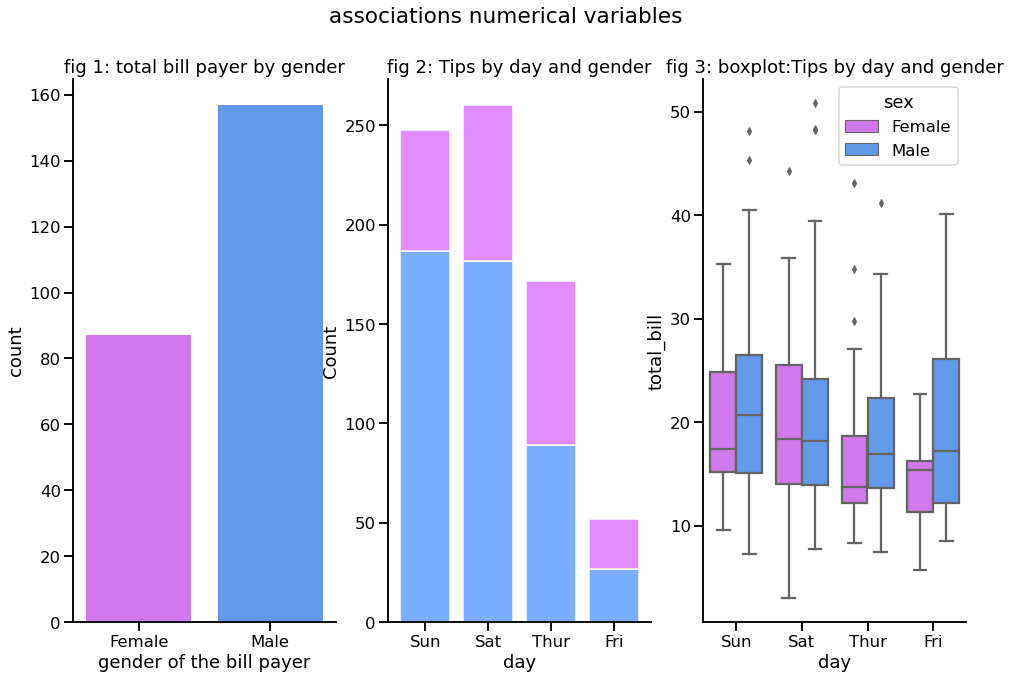

In [18]:
fig,axes = plt.subplots(1,3, figsize=(16,10))
fig.suptitle("associations numerical variables")


colors= {"Female": "#d966ff",
        "Male": "#4d94ff"}

sns.countplot(x="sex", data=tips,palette=colors, ax=axes[0])
axes[0].set_xlabel("gender of the bill payer")
axes[0].set_title("fig 1: total bill payer by gender")
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

sns.histplot(tips,
    x='day',
    weights='tip',
    hue='sex',
    multiple='stack',
    palette=["#d966ff","#4d94ff"],
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8,ax=axes[1], legend=False)

axes[1].set_title('fig 2: Tips by day and gender')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

sns.boxplot(x="day", y="total_bill",
            hue="sex",data=tips,palette=["#d966ff","#4d94ff"],ax=axes[2])
axes[2].set_title('fig 3: boxplot:Tips by day and gender')
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

plt.show()

$~$

+ fig 1. shows that there are more male payers than female payers:

$~$

+ fig 2 Iwe can see that, in effect, since there are more male payers, more tips where made by men. Also, we can see that the day with **the most tips is Saturday**.

$~$

+ fig 3 no matter the gender, the median of the tips in Saturdays is more or less the same

$~$

____________

$~$

**2 :**

$~$

Repeat exercise 1 with the dataset in the GitHu ["PRE-PROCESSING-DATA"](https://github.com/IT-Academy-BCN/Data-Science/tree/main/Pre-processing-data) with the ["movies.data"](https://github.com/IT-Academy-BCN/Data-Science/blob/main/Pre-processing-data/movies.dat) dataset. 


$~$

$~$

as usual, let's load our data:

$~$

In [19]:
path="https://raw.githubusercontent.com/IT-Academy-BCN/Data-Science/main/Pre-processing-data/movies.dat"

In [20]:
df = pd.read_table(path,sep='::', header=None, engine='python',encoding='latin-1')

$~$

get some general information about the data:

$~$

In [21]:
df.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3883 non-null   int64 
 1   1       3883 non-null   object
 2   2       3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [23]:
df.shape

(3883, 3)

$~$

since the columns don't have any title, let's assign some:

$~$

In [24]:
df.columns=['id','title','genre']

In [25]:
df.head()

,id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


$~$

we see that all elements of *Movie* have the year of the movie indicated, so we can create a new column with only that information:

$~$


In [26]:
df['release_year'] = df["title"].str[-5:-1]

$~$

let's clean the title:

$~$

In [27]:
df['title'] = df['title'].str.extract('(.*)[\s]', expand=True)

In [28]:
df.head()

,id,title,genre,release_year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


$~$

now we are going to create a dummies variable for each possible genre :

$~$


In [29]:
dummies = df['genre'].str.get_dummies()

In [30]:
dummies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


$~$

let's concatenate these dummies to the original data frame:


$~$


In [31]:
df = pd.concat([df, dummies], axis=1)               

$~$

sort by release_year

$~$

In [32]:
df = df.sort_values(by="release_year")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 3063 to 3882
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            3883 non-null   int64 
 1   title         3883 non-null   object
 2   genre         3883 non-null   object
 3   release_year  3883 non-null   object
 4   Action        3883 non-null   int64 
 5   Adventure     3883 non-null   int64 
 6   Animation     3883 non-null   int64 
 7   Children's    3883 non-null   int64 
 8   Comedy        3883 non-null   int64 
 9   Crime         3883 non-null   int64 
 10  Documentary   3883 non-null   int64 
 11  Drama         3883 non-null   int64 
 12  Fantasy       3883 non-null   int64 
 13  Film-Noir     3883 non-null   int64 
 14  Horror        3883 non-null   int64 
 15  Musical       3883 non-null   int64 
 16  Mystery       3883 non-null   int64 
 17  Romance       3883 non-null   int64 
 18  Sci-Fi        3883 non-null   int64 
 19  Thr

In [34]:
df.head(3)

,id,title,genre,release_year,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3063,3132,Daddy Long Legs,Comedy,1919,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2754,2823,"Spiders, The (Die Spinnen, 1. Teil: Der Golden...",Action|Drama,1919,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2752,2821,Male and Female,Adventure|Drama,1919,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


$~$

after Getting and cleaning the data, let's move forward:

$~$
___

$~$

+ visualizing the total volume of films created over the years:

$~$

In [35]:
movies_per_year = df.groupby(df.release_year)["id"].count()

In [36]:
movies_per_year

release_year
1919      3
1920      2
1921      1
1922      2
1923      3
       ... 
1996    345
1997    315
1998    337
1999    283
2000    156
Name: id, Length: 81, dtype: int64

$~$

let's plot movies_per_year:

$~$

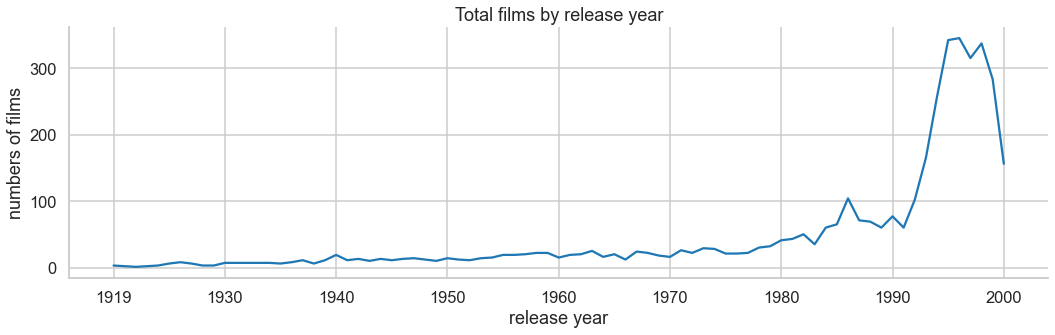

In [37]:
## Line Graph for number of films produced by release year
sns.set_style("whitegrid")

movies_per_year.plot(figsize=(15,5),
       title="Total films by release year",
        ylabel= "numbers of films",
        xlabel ="release year",
        )
sns.despine(right=True)

plt.tight_layout()
plt.show()

$~$

+ Let's see some information about the genres:

    

$~$

In [38]:
genres = df.iloc[:, 4:].sum().sort_values(ascending=False)

genres

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Western          68
Fantasy          68
Film-Noir        44
dtype: int64

$~$

the table above shows that the most popular genre is drama and the least is film-noir. let's plot it:


$~$

$~$

 Let's get a top 5 genres by the total number of movies.
 
$~$

In [39]:
    
top5 = genres.head(5).index.values

top5

array(['Drama', 'Comedy', 'Action', 'Thriller', 'Romance'], dtype=object)

$~$

First, let's visualize a pie plot  where it shows the genres by percentage

$~$


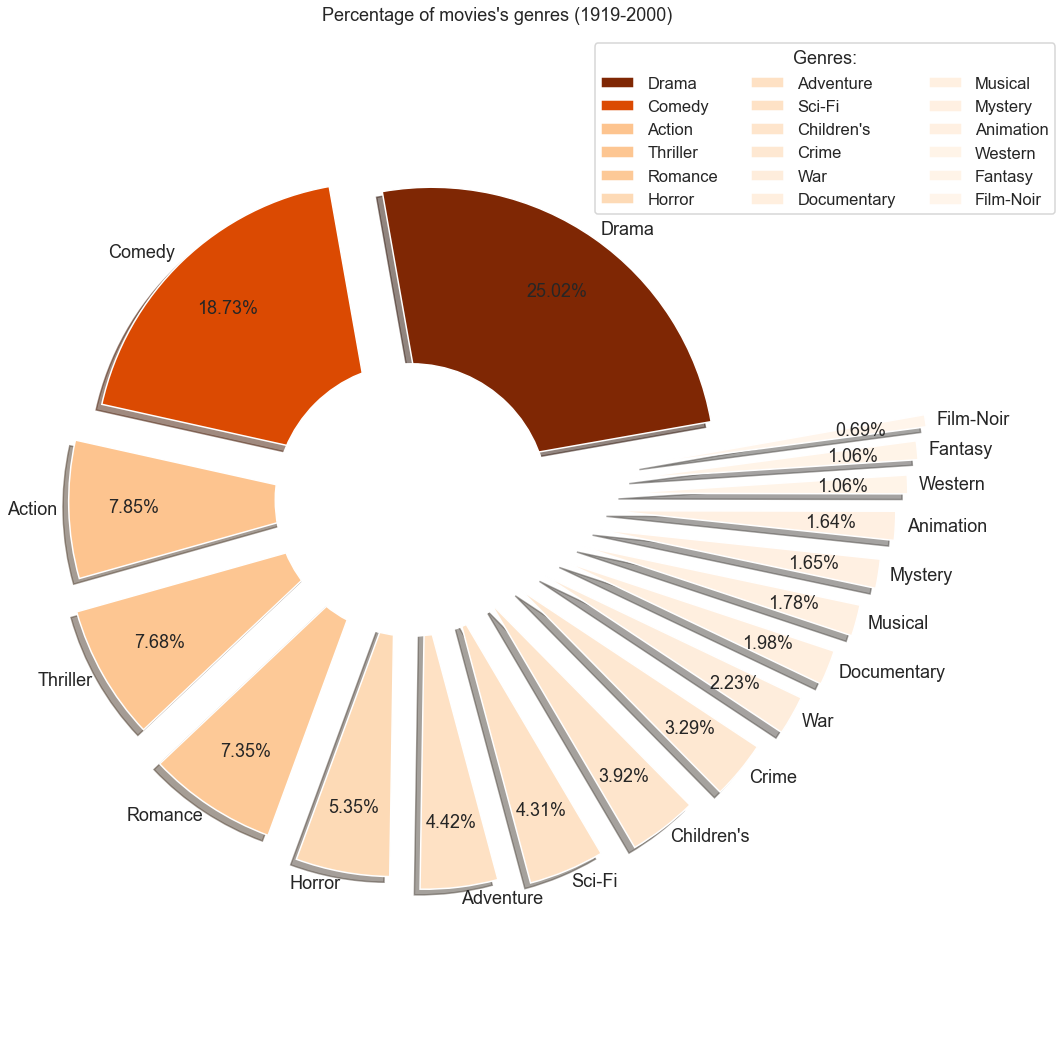

In [40]:
y = genres
labels = y.index

explode = [i/24 for i in range(3,len(y)+3)]

normdata = mpl.colors.Normalize(min(y), max(y))  
colormap = mpl.cm.Oranges #this line allows us to change the colors
colors =colormap(normdata(y))


fig1, ax1 = plt.subplots(figsize=(15,15))

ax1.pie(y, explode=explode, labels=labels, autopct='%.2f%%',pctdistance=0.77,labeldistance=1.04,
        shadow=True, startangle=10, colors=colors,
       textprops={'size': 'medium'})

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("Percentage of movies's genres (1919-2000)",fontsize=18)

#ax1.legend(bbox_to_anchor=(1,1), loc=6)

plt.legend(title = "Genres:",labels=labels,loc="right",ncol=3,
          bbox_to_anchor=(1.1,0.9))


#draw inner circle
centre_circle = plt.Circle((0,0),.48,fc='white')

fig = plt.gcf()

fig.gca().add_artist(centre_circle)


plt.tight_layout()


plt.show()

$~$

Thus, it is easier to visualize the importance of each gender.

$~$

Let's see other ways to visualize the same data by release year

$~$

In [41]:
genres_year = df.iloc[:, 3:].groupby("release_year").sum().loc[:,:]


In [42]:
genres_year

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,
1919,1,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0
1920,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
1921,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1922,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1923,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,37,22,7,20,115,23,19,150,5,2,12,7,6,48,14,45,8,1
1997,43,22,6,22,98,26,11,139,6,2,10,5,15,52,18,55,10,0
1998,44,16,8,18,112,25,18,166,2,3,15,3,10,58,17,51,5,1


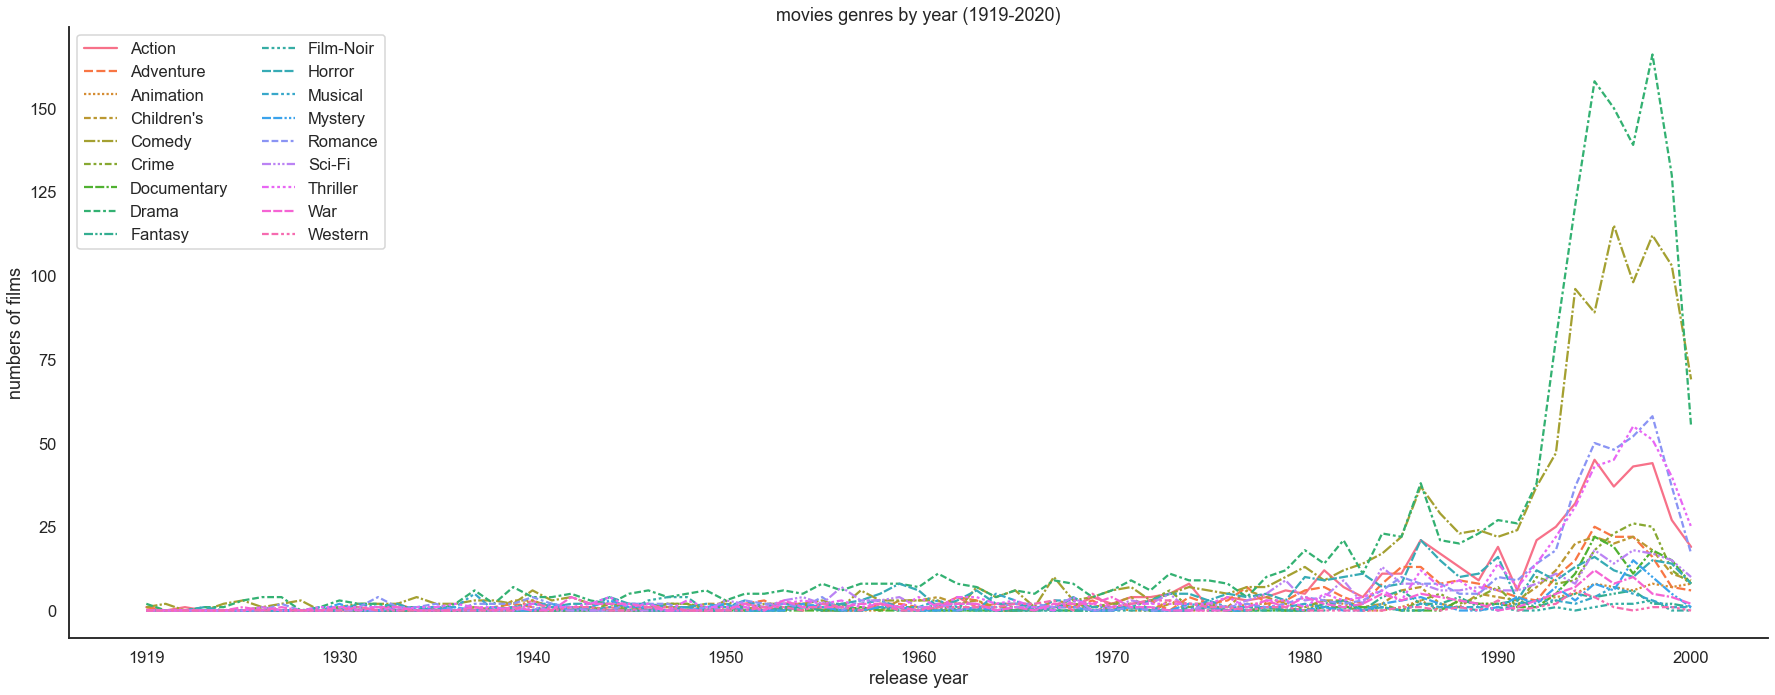

In [43]:
sns.set_context("talk")

sns.set_style("white")

plt.figure(figsize=(25, 10))


sns.lineplot(data=genres_year.loc[:,:]).set(
title="movies genres by year (1919-2020)",
        ylabel= "numbers of films",
        xlabel ="release year")
sns.despine(right=True)

plt.legend(ncol=2)
plt.tight_layout()

plt.xticks(np.arange(0, 90, 10)) 


plt.show()

$~$

it seems that from the 80s when certain genres stand out more than others

$~$


it would be much better if we see the same plot but only for the top 5 genres

$~$


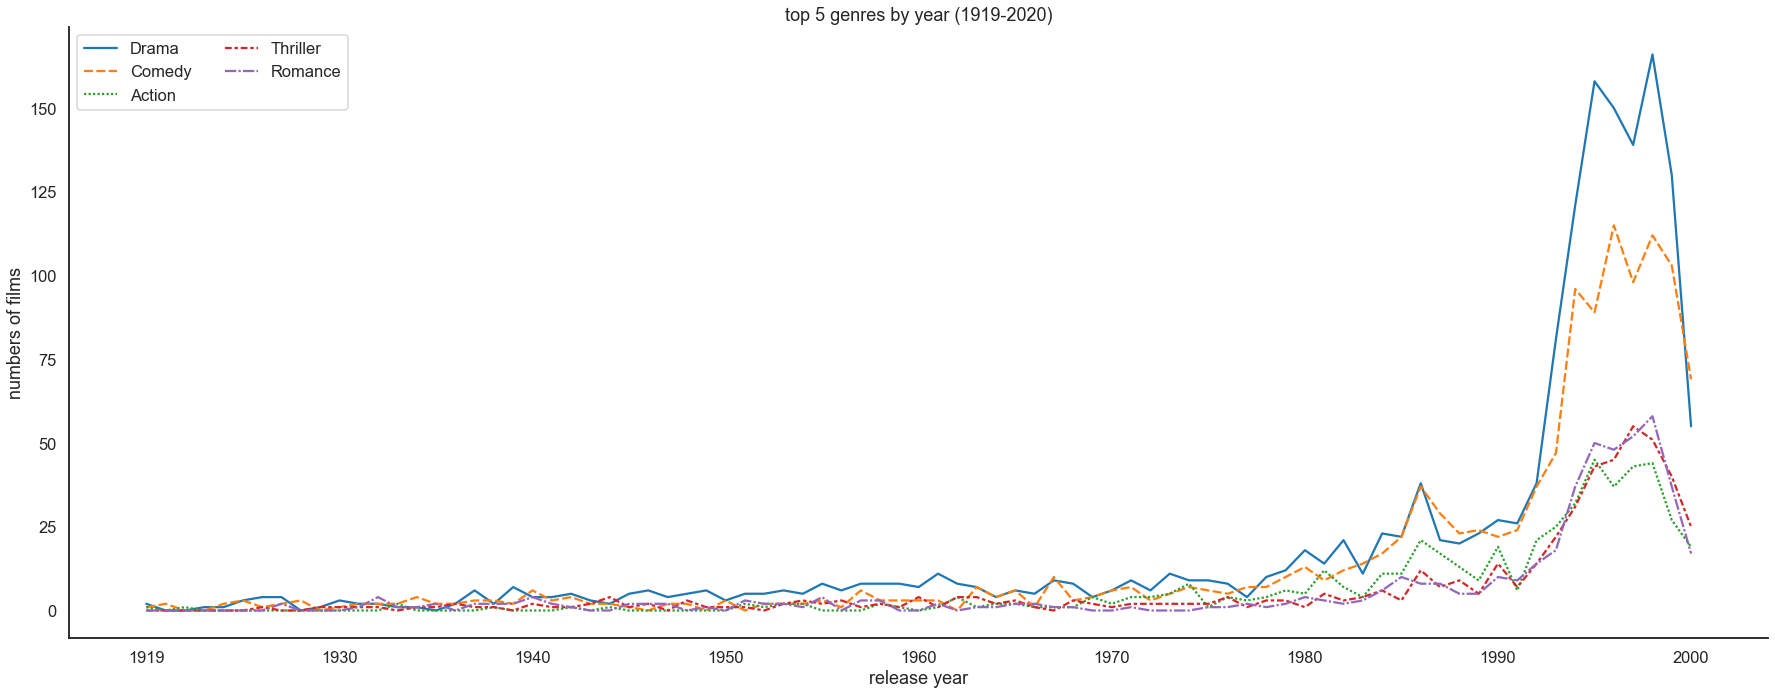

In [44]:
sns.set_context("talk")
sns.set_style("white")

plt.figure(figsize=(25, 10))


sns.lineplot(data=genres_year.loc[:,top5]).set(title="top 5 genres by year (1919-2020)",
        ylabel= "numbers of films",
        xlabel ="release year")

sns.despine(right=True)

plt.legend(ncol=2)
plt.tight_layout()

plt.xticks(np.arange(0, 90, 10)) 
#plt.xticks(rotation=90);
plt.show()

$~$

**3 :**

$~$

In this exercise we will not give you any indications because we want you to show  your creativity out. 


$~$

$~$

let's plot the numbers of films by year:

$~$

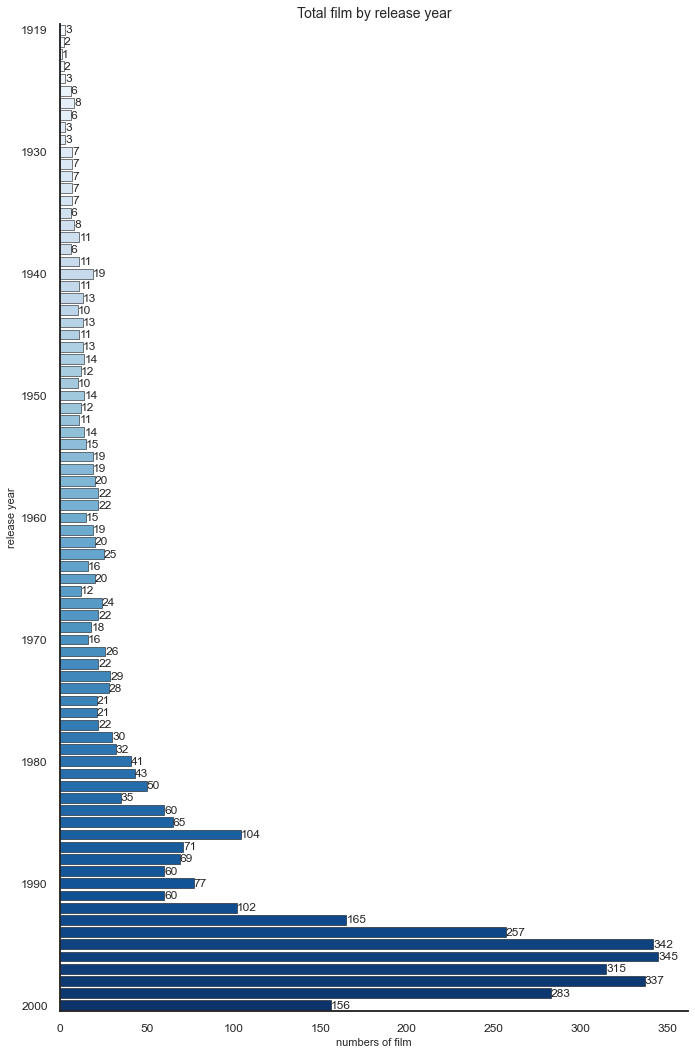

In [45]:
sns.set_context("talk")
sns.set_style("white")

plt.figure(figsize= (10,15))
ax = sns.countplot(y="release_year", data=df, palette="Blues",
                   edgecolor=(0,0,0),linewidth=0.5,saturation=0.9)

for container in ax.containers:
    ax.bar_label(container,size=12)
plt.title("Total film by release year",size=14)
plt.xlabel("numbers of film",size=11)
plt.ylabel("release year",size=11)
plt.yticks(np.arange(0, 90, 10), size=12) 
plt.xticks(size=12)
plt.yticks(size=12)

sns.despine(right=True)
plt.tight_layout()
plt.show()


$~$

also we can try to plot a Treemaps of all movi genre distribution:

$~$

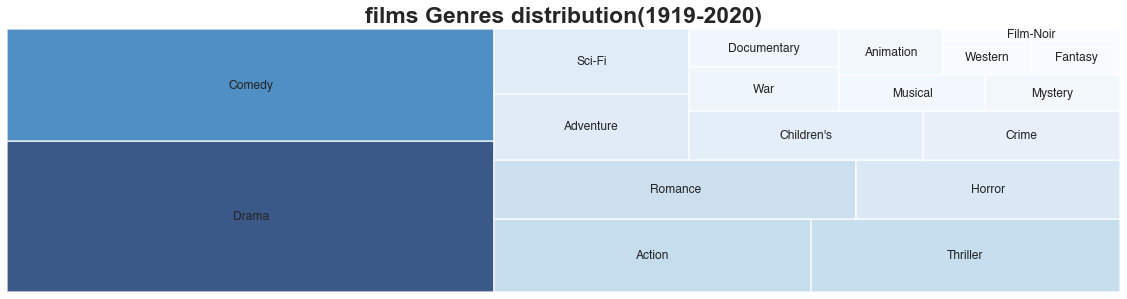

In [46]:
import squarify

normdata = mpl.colors.Normalize(min(genres.values), max(genres.values))  
colormap = mpl.cm.Blues #this line allows us to change the colors
colors =colormap(normdata(genres.values))


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)

squarify.plot(sizes=genres.values, alpha=0.8, label=genres.index,color = colors,
              text_kwargs={'fontsize':12, 'fontname':"helvetica",'weight':'bold'})
plt.title("films Genres distribution(1919-2020)",fontsize=23,fontweight="bold")
plt.axis('off')
plt.tight_layout()

plt.show()

$~$

with this plot it is much easier to understand that the drama was the most relevant genre and the leats was film-noir


$~$

$~$

In addition, we can plot a heat map, this would be useful to identify at what point  the number of films by genre increases

$~$

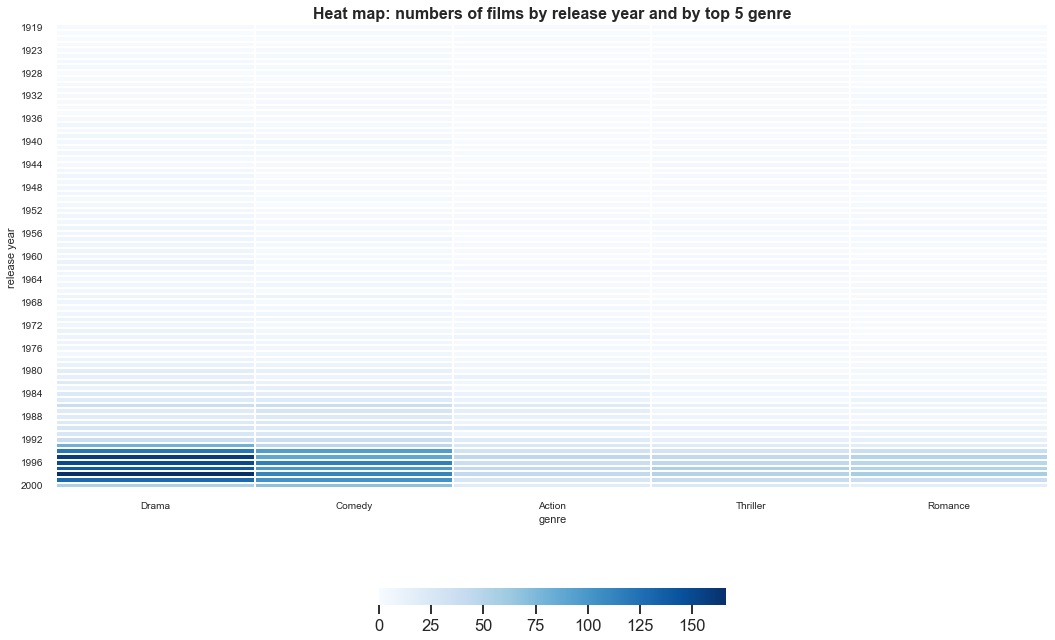

In [47]:

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(genres_year.loc[:,top5],annot=False, fmt="d", linewidths=.01, ax=ax, cmap="Blues",
            cbar_kws={"shrink": .35,"orientation": "horizontal"})
plt.title("Heat map: numbers of films by release year and by top 5 genre", fontsize=16, fontweight="bold")

plt.yticks(size=10)
plt.xticks(size=10)
plt.xlabel("genre",size=11)
plt.ylabel("release year",size=11)

plt.tight_layout()


plt.show()

$~$

it seems that it is from the nineties when the top 5 genres grow more

$~$

$~$

Likewise, we can plot a correlation matrix for all genres

$~$

+ first let's create the correlation matrix:

In [48]:
df_corr = genres_year.corr()

np.ones_like(df_corr, dtype=bool)

mask = np.triu(np.ones_like(df_corr, dtype=bool))

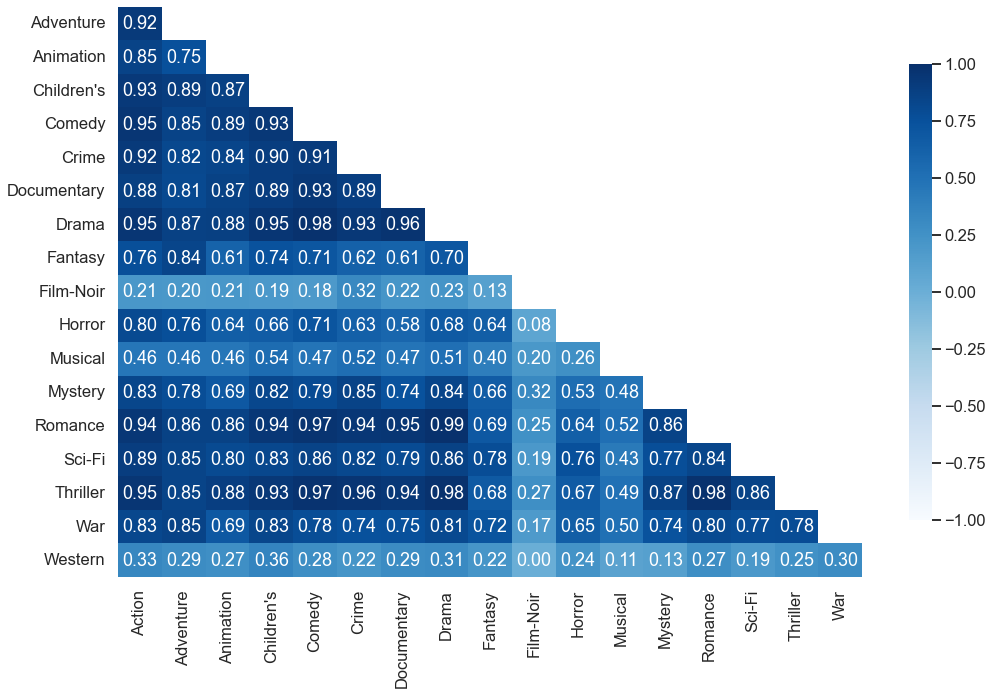

In [49]:
fig, ax = plt.subplots(figsize=(15,10))# mask

mask = np.triu(np.ones_like(df_corr, dtype=bool))# adjust mask and df

mask = mask[1:, :-1]

corr = df_corr.iloc[1:,:-1].copy()# plot heatmap

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})# yticks

plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

$~$

here, we can see how one gender is related to another


$~$